In [ ]:
import smdp
import rollouts
import matplotlib.pyplot as plt
import numpy as np

episode_length = 2500
nr_rollouts = 100

average_rewards = []
thresholds = [0, 1, 2, 3, 4, 5, 6, 7]

functions = dict()  # dictionary of threshold policy functions for each threshold
for threshold in thresholds:
    env = smdp.SMDP(episode_length)
    functions[threshold] = lambda state: smdp.threshold_policy(env, threshold=threshold)

for threshold in thresholds:
    env = smdp.SMDP(episode_length)
    average_rewards.append(np.mean(rollouts.evaluate_policy(env, functions[threshold], nr_rollouts, ppo=True)))
    print(threshold, average_rewards[-1])
print(average_rewards)

0 -22460.6818367837
1 -23163.981863952493
2 -21866.36175877984
3 -21812.614478199546
4 -22701.103741035993
5 -23190.34685505343
6 -25080.344616469225
7 -26323.309633787045
[-22460.6818367837, -23163.981863952493, -21866.36175877984, -21812.614478199546, -22701.103741035993, -23190.34685505343, -25080.344616469225, -26323.309633787045]


# Plot the threshold policies

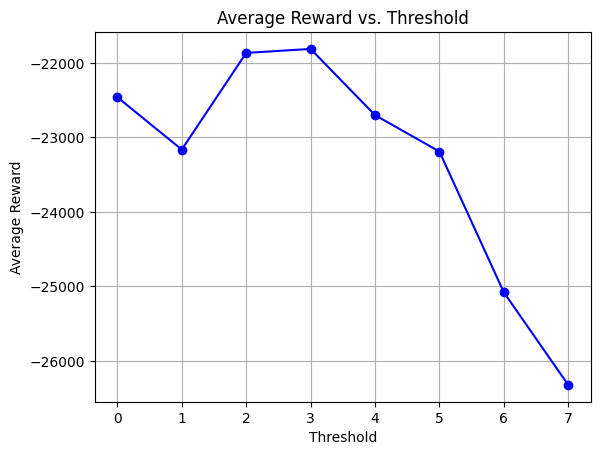

In [2]:
plt.plot(thresholds, average_rewards, marker='o', linestyle='-', color='b')
plt.xlabel('Threshold')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Threshold')
plt.grid(True)
plt.xticks(thresholds)
plt.show()